In [325]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt, find_peaks


# ---- GLOBAL FONT SETUP  ----------------------------------------------------
plt.rcParams.update({
    "font.family": "monospace",   # any installed font
    "font.size":   8,               # base size
    "axes.titlesize":   9,
    "axes.labelsize":    8,
    "xtick.labelsize":   7,
    "ytick.labelsize":   7,
    "legend.fontsize":   7,
})

# Sampling settings
sampling_rate = 100  # 100Hz x 2 channels
duration_seconds = 30
time_axis = np.linspace(0, duration_seconds, sampling_rate * duration_seconds)

In [326]:
# === File paths ===
filenames = {
    "data/normal_sample_1.csv": "resting_1",
    "data/normal_sample_2.csv": "resting_2",
    "data/exercise_sample_1.csv": "exercise_1",
    "data/exercise_sample_2.csv": "exercise_2"
}

# === Storage dictionary ===
data = {}

# === Read and extract ===
for file, tag in filenames.items():
    df = pd.read_csv(file)

    # Extract columns to named arrays
    data[f"raw_pressure_{tag}"] = df["Raw_V1 (Pressure)"].to_numpy()
    data[f"raw_rubber_{tag}"] = df["Raw_V2 (Rubber)"].to_numpy()

# === Optional: access example ===
raw_pressure_normal_1 = data["raw_pressure_resting_1"]
raw_pressure_normal_2 = data["raw_pressure_resting_2"]

raw_pressure_exercise_1 = data["raw_pressure_exercise_1"]
raw_pressure_exercise_2 = data["raw_pressure_exercise_2"]

raw_rubber_normal_1 = data["raw_rubber_resting_1"]
raw_rubber_normal_2 = data["raw_rubber_resting_2"]

raw_rubber_exercise_1 = data["raw_rubber_exercise_1"]
raw_rubber_exercise_2 = data["raw_rubber_exercise_2"]

# === Print confirmation of array sizes ===
# for key, arr in data.items():
#     print(f"{key}: {arr.shape}")

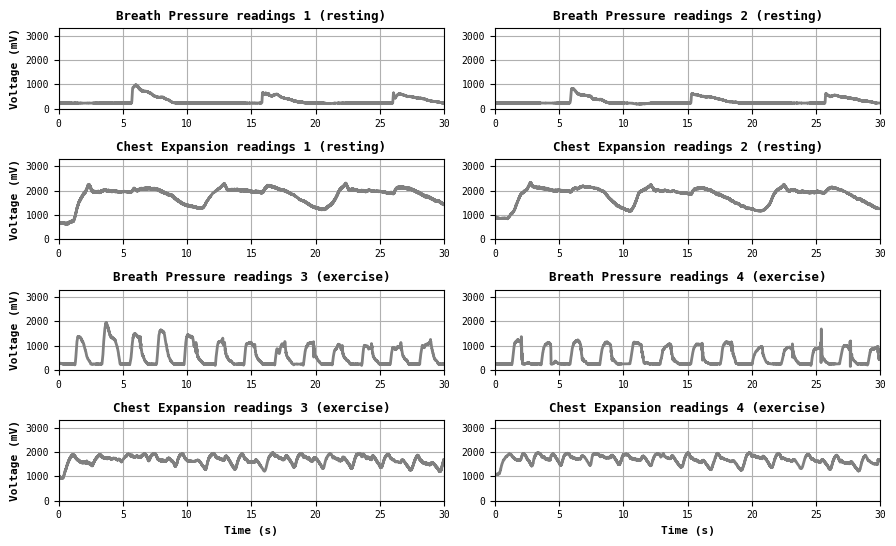

In [332]:
# --- Formatting parameters ---
line_width = 2
line_color = 'grey'
y_min, y_max = 0, 3300
x_min, x_max = 0, 30

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(9, 5.5))

#* ------------------ NORMAL ---------------------
axs[0][0].plot(time_axis, raw_pressure_normal_1, color=line_color, linewidth=line_width)
axs[0][0].set_title("Breath Pressure readings 1 (resting)", fontweight='bold')
axs[0][0].set_ylabel("Voltage (mV)", fontweight='bold')
axs[0][0].set_ylim(y_min, y_max)
axs[0][0].set_xlim(x_min, x_max)
axs[0][0].grid(True)

axs[0][1].plot(time_axis, raw_pressure_normal_2, color=line_color, linewidth=line_width)
axs[0][1].set_title("Breath Pressure readings 2 (resting)", fontweight='bold')
axs[0][1].set_ylim(y_min, y_max)
axs[0][1].set_xlim(x_min, x_max)
axs[0][1].grid(True)

axs[1][0].plot(time_axis, raw_rubber_normal_1, color=line_color, linewidth=line_width)
axs[1][0].set_title("Chest Expansion readings 1 (resting)", fontweight='bold')
axs[1][0].set_ylabel("Voltage (mV)", fontweight='bold')
axs[1][0].set_ylim(y_min, y_max)
axs[1][0].set_xlim(x_min, x_max)
axs[1][0].grid(True)

axs[1][1].plot(time_axis, raw_rubber_normal_2, color=line_color, linewidth=line_width)
axs[1][1].set_title("Chest Expansion readings 2 (resting)", fontweight='bold')
axs[1][1].set_ylim(y_min, y_max)
axs[1][1].set_xlim(x_min, x_max)
axs[1][1].grid(True)

#* ------------------ EXERCISE ---------------------
axs[2][0].plot(time_axis, raw_pressure_exercise_1, color=line_color, linewidth=line_width)
axs[2][0].set_title("Breath Pressure readings 3 (exercise)", fontweight='bold')
axs[2][0].set_ylabel("Voltage (mV)", fontweight='bold')
axs[2][0].set_ylim(y_min, y_max)
axs[2][0].set_xlim(x_min, x_max)
axs[2][0].grid(True)

axs[2][1].plot(time_axis, raw_pressure_exercise_2, color=line_color, linewidth=line_width)
axs[2][1].set_title("Breath Pressure readings 4 (exercise)", fontweight='bold')
axs[2][1].set_ylim(y_min, y_max)
axs[2][1].set_xlim(x_min, x_max)
axs[2][1].grid(True)

axs[3][0].plot(time_axis, raw_rubber_exercise_1, color=line_color, linewidth=line_width)
axs[3][0].set_title("Chest Expansion readings 3 (exercise)", fontweight='bold')
axs[3][0].set_xlabel("Time (s)", fontweight='bold')
axs[3][0].set_ylabel("Voltage (mV)", fontweight='bold')
axs[3][0].set_ylim(y_min, y_max)
axs[3][0].set_xlim(x_min, x_max)
axs[3][0].grid(True)

axs[3][1].plot(time_axis, raw_rubber_exercise_2, color=line_color, linewidth=line_width)
axs[3][1].set_title("Chest Expansion readings 4 (exercise)", fontweight='bold')
axs[3][1].set_xlabel("Time (s)", fontweight='bold')
axs[3][1].set_ylim(y_min, y_max)
axs[3][1].set_xlim(x_min, x_max)
axs[3][1].grid(True)

plt.tight_layout()
plt.savefig("output/raw_values_plot.png", dpi=600, bbox_inches='tight')
plt.show()


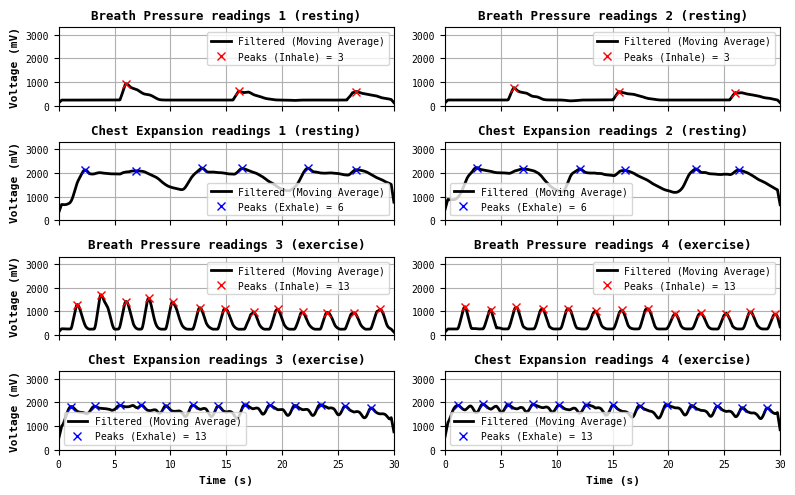

In [333]:
# --- Parameters ---
window_size = 50  # for 1-second smoothing

# === Plot Formatting Settings ===
line_width = 2

pressure_color = 'black'
rubber_color = 'black'

# --- Separate marker styles ---
pressure_peak_marker = 'x'
pressure_peak_color = 'red'

rubber_peak_marker = 'x'
rubber_peak_color = 'blue'

peak_distance = 160
peak_prominence = 60
y_min, y_max = 0, 3300
x_min, x_max = 0, 30

# --- Moving average filter ---
def moving_average(signal, window):
    return np.convolve(signal, np.ones(window)/window, mode='same')

# --- All signals with updated labels ---
signal_list = [
    (raw_pressure_normal_1,  "Breath Pressure readings 1 (resting)"),
    (raw_pressure_normal_2,  "Breath Pressure readings 2 (resting)"),
    (raw_rubber_normal_1,    "Chest Expansion readings 1 (resting)"),
    (raw_rubber_normal_2,    "Chest Expansion readings 2 (resting)"),
    (raw_pressure_exercise_1, "Breath Pressure readings 3 (exercise)"),
    (raw_pressure_exercise_2, "Breath Pressure readings 4 (exercise)"),
    (raw_rubber_exercise_1,   "Chest Expansion readings 3 (exercise)"),
    (raw_rubber_exercise_2,   "Chest Expansion readings 4 (exercise)"),
]

# --- Plotting ---
fig, axs = plt.subplots(4, 2, figsize=(8, 5), sharex=True)

for idx, (signal, label) in enumerate(signal_list):
    row, col = divmod(idx, 2)
    ax = axs[row][col]

    filtered = moving_average(signal, window_size)
    peaks, _ = find_peaks(filtered, distance=peak_distance, prominence=peak_prominence)

    is_pressure = "Pressure" in label
    line_color = pressure_color if is_pressure else rubber_color
    peak_label = f"Peaks (Inhale) = {len(peaks)}" if is_pressure else f"Peaks (Exhale) = {len(peaks)}"
    peak_marker = pressure_peak_marker if is_pressure else rubber_peak_marker
    peak_color = pressure_peak_color if is_pressure else rubber_peak_color

    ax.plot(time_axis, filtered, label="Filtered (Moving Average)", color=line_color, linewidth=line_width)
    ax.plot(time_axis[peaks], filtered[peaks], linestyle='None',
            marker=peak_marker, color=peak_color, label=peak_label)
    
    ax.set_title(label, weight="bold")
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.grid(True)
    ax.legend(fontsize=7, loc="best")

    if row == 3:
        ax.set_xlabel("Time (s)", weight='bold')
    if col == 0:
        ax.set_ylabel("Voltage (mV)", weight='bold')

plt.tight_layout()
plt.savefig("output/moving_average_filtered_plot.png", dpi=600, bbox_inches='tight')
plt.show()



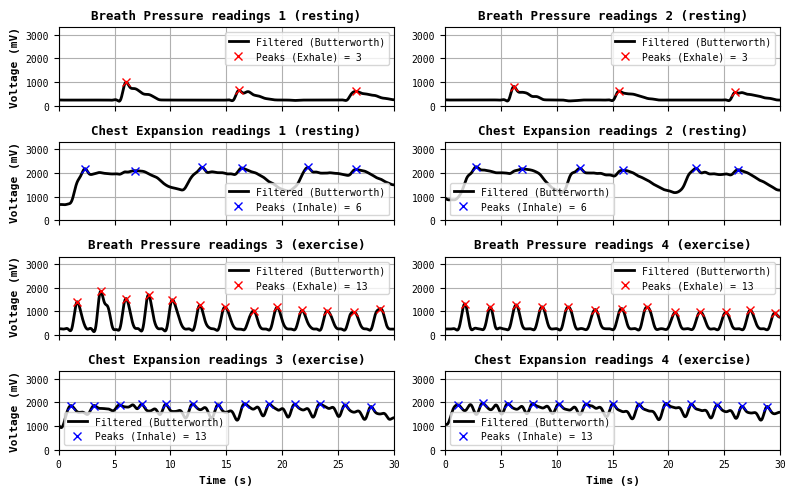


Average Peak Voltages (Butterworth Filtered):
Breath Pressure readings 1 (resting)          : 746.44 mV
Breath Pressure readings 2 (resting)          : 660.93 mV
Chest Expansion readings 1 (resting)          : 2181.51 mV
Chest Expansion readings 2 (resting)          : 2176.15 mV
Breath Pressure readings 3 (exercise)         : 1284.85 mV
Breath Pressure readings 4 (exercise)         : 1102.47 mV
Chest Expansion readings 3 (exercise)         : 1898.13 mV
Chest Expansion readings 4 (exercise)         : 1910.45 mV


In [334]:
# === Filter Parameters ===
cutoff_hz = 1.5      # Hz
order = 5
sampling_rate = 100  # Hz
nyq = 0.5 * sampling_rate
normal_cutoff = cutoff_hz / nyq

# === Plot Formatting Settings ===
line_width = 2
pressure_color = 'black'
rubber_color = 'black'

# --- Separate marker styles ---
pressure_peak_marker = 'x'
pressure_peak_color = 'red'

rubber_peak_marker = 'x'
rubber_peak_color = 'blue'

peak_distance = 160
peak_prominence = 60
y_min, y_max = 0, 3300
x_min, x_max = 0, 30

# === Butterworth Filter Setup ===
b, a = butter(order, normal_cutoff, btype='low', analog=False)
def butterworth_filter(signal):
    return filtfilt(b, a, signal)

# === All Signals with Labels ===
signal_list = [
    (raw_pressure_normal_1,  "Breath Pressure readings 1 (resting)"),
    (raw_pressure_normal_2,  "Breath Pressure readings 2 (resting)"),
    (raw_rubber_normal_1,    "Chest Expansion readings 1 (resting)"),
    (raw_rubber_normal_2,    "Chest Expansion readings 2 (resting)"),
    (raw_pressure_exercise_1, "Breath Pressure readings 3 (exercise)"),
    (raw_pressure_exercise_2, "Breath Pressure readings 4 (exercise)"),
    (raw_rubber_exercise_1,   "Chest Expansion readings 3 (exercise)"),
    (raw_rubber_exercise_2,   "Chest Expansion readings 4 (exercise)"),
]

# === Plotting ===
fig, axs = plt.subplots(4, 2, figsize=(8, 5), sharex=True)

for idx, (signal, label) in enumerate(signal_list):
    row, col = divmod(idx, 2)
    ax = axs[row][col]

    filtered = butterworth_filter(signal)
    peaks, _ = find_peaks(filtered, distance=peak_distance, prominence=peak_prominence)

    is_pressure = "Pressure" in label
    line_color = pressure_color if is_pressure else rubber_color
    peak_label = f"Peaks (Exhale) = {len(peaks)}" if is_pressure else f"Peaks (Inhale) = {len(peaks)}"
    peak_marker = pressure_peak_marker if is_pressure else rubber_peak_marker
    peak_color = pressure_peak_color if is_pressure else rubber_peak_color

    ax.plot(time_axis, filtered, label="Filtered (Butterworth)", color=line_color, linewidth=line_width)
    ax.plot(time_axis[peaks], filtered[peaks], linestyle='None',
            marker=peak_marker, color=peak_color, label=peak_label)
    
    ax.set_title(label, weight="bold")
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.grid(True)
    ax.legend(fontsize=7, loc="best")

    if row == 3:
        ax.set_xlabel("Time (s)", weight='bold')
    if col == 0:
        ax.set_ylabel("Voltage (mV)", weight='bold')

plt.tight_layout()
plt.savefig("output/butterworth_filtered_plot.png", dpi=600, bbox_inches='tight')
plt.show()

avg_peak_voltages = []

for signal, label in signal_list:
    filtered = butterworth_filter(signal)
    peaks, _ = find_peaks(filtered, distance=peak_distance, prominence=peak_prominence)
    avg_voltage = np.mean(filtered[peaks]) if len(peaks) > 0 else 0
    avg_peak_voltages.append((label, round(avg_voltage, 2)))

# === Print summary ===
print("\nAverage Peak Voltages (Butterworth Filtered):")
for label, avg_v in avg_peak_voltages:
    print(f"{label:<45} : {avg_v} mV")


In [330]:
# === Expected number of peaks for each signal ===
expected_peaks = {
    "Pressure resting 1": 3,
    "Pressure resting 2": 3,
    "Rubber resting 1": 6,
    "Rubber resting 2": 6,
    "Pressure Exercise 1": 13,
    "Pressure Exercise 2": 13,
    "Rubber Exercise 1": 13,
    "Rubber Exercise 2": 13,
}

# === Signal dictionary ===
signals = {
    "Pressure resting 1": raw_pressure_normal_1,
    "Pressure resting 2": raw_pressure_normal_2,
    "Rubber resting 1": raw_rubber_normal_1,
    "Rubber resting 2": raw_rubber_normal_2,
    "Pressure Exercise 1": raw_pressure_exercise_1,
    "Pressure Exercise 2": raw_pressure_exercise_2,
    "Rubber Exercise 1": raw_rubber_exercise_1,
    "Rubber Exercise 2": raw_rubber_exercise_2,
}

# === Moving average filter ===
def moving_average(signal, window):
    return np.convolve(signal, np.ones(window)/window, mode='same')

# === Parameter Ranges ===
window_sizes = np.arange(10, 200, 10)         # e.g., 10 to 190
distance_values = np.arange(100, 201, 20)     # e.g., 100 to 200
prominence_values = np.arange(30, 101, 10)    # e.g., 30 to 100

# === Store results ===
results = []

# === Evaluation Loop ===
for win in window_sizes:
    for distance in distance_values:
        for prominence in prominence_values:
            total_accuracy = 0

            for label, signal in signals.items():
                filtered = moving_average(signal, win)
                peaks, _ = find_peaks(filtered, distance=distance, prominence=prominence)
                peak_count = len(peaks)

                expected = expected_peaks[label]
                accuracy = 100 * (1 - abs(peak_count - expected) / expected)
                total_accuracy += max(0, accuracy)

            avg_accuracy = total_accuracy / len(signals)

            results.append({
                "Window_Size": win,
                "Distance": distance,
                "Prominence": prominence,
                "Avg_Accuracy": avg_accuracy
            })

# === Save to Excel ===
df = pd.DataFrame(results)
df.to_excel("output_params/moving_average_params_test.xlsx", index=False)


In [331]:
# === Expected peaks for each signal ===
expected_peaks = {
    "Breath Pressure readings 1 (resting)": 3,
    "Breath Pressure readings 2 (resting)": 3,
    "Chest Expansion readings 1 (resting)": 6,
    "Chest Expansion readings 2 (resting)": 6,
    "Breath Pressure readings 1 (exercise)": 13,
    "Breath Pressure readings 2 (exercise)": 13,
    "Chest Expansion readings 1(exercise)": 13,
    "Chest Expansion readings 2 (exercise)": 13,
}

# === Signal dictionary (replace with your actual signal variables) ===
signals = {
    "Breath Pressure readings 1 (resting)": raw_pressure_normal_1,
    "Breath Pressure readings 2 (resting)": raw_pressure_normal_2,
    "Chest Expansion readings 1 (resting)": raw_rubber_normal_1,
    "Chest Expansion readings 2 (resting)": raw_rubber_normal_2,
    "Breath Pressure readings 1 (exercise)": raw_pressure_exercise_1,
    "Breath Pressure readings 2 (exercise)": raw_pressure_exercise_2,
    "Chest Expansion readings 1(exercise)": raw_rubber_exercise_1,
    "Chest Expansion readings 2 (exercise)": raw_rubber_exercise_2,
}

# === Parameter ranges ===
cutoff_hz_values = np.arange(0.5, 3.1, 0.5)         # 0.5 to 3.0 Hz
order_values = [2, 3, 4, 5, 6]
distance_values = np.arange(100, 201, 20)
prominence_values = np.arange(30, 101, 10)

# === Sampling Rate ===
sampling_rate = 100
nyq = 0.5 * sampling_rate

# === Results storage ===
results = []

# === Nested Loop for Parameter Grid ===
for cutoff_hz in cutoff_hz_values:
    for order in order_values:
        for distance in distance_values:
            for prominence in prominence_values:
                normal_cutoff = cutoff_hz / nyq
                b, a = butter(order, normal_cutoff, btype='low', analog=False)

                total_accuracy = 0
                for label, signal in signals.items():
                    # Apply Butterworth Filter
                    filtered = filtfilt(b, a, signal)

                    # Detect Peaks
                    peaks, _ = find_peaks(filtered, distance=distance, prominence=prominence)
                    detected = len(peaks)
                    expected = expected_peaks[label]

                    # Calculate accuracy
                    acc = 100 * (1 - abs(detected - expected) / expected)
                    total_accuracy += max(0, acc)

                avg_accuracy = total_accuracy / len(signals)

                # Save this row
                results.append({
                    "Cutoff_Hz": cutoff_hz,
                    "Order": order,
                    "Distance": distance,
                    "Prominence": prominence,
                    "Avg_Accuracy": avg_accuracy
                })

# === Convert to DataFrame and export ===
df = pd.DataFrame(results)
df.to_excel("output_params/butterworth_params_test.xlsx", index=False)
